<a href="https://colab.research.google.com/github/sergioc248/apuntes-inteligencia-artificial/blob/main/Apuntes_EDA_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="cyan">Cuaderno 5: Creación de Nuevas Características
La creación de nuevas características (feature engineering) es un paso crucial en el preprocesamiento de datos, ya que puede mejorar la capacidad predictiva de los modelos al transformar y combinar los datos originales.

---

## <font color="cyan">5.1 Combinación y Transformación de Características Existentes
La combinación de características implica usar variables existentes para generar nuevas que reflejen relaciones entre ellas.
### Ejemplo: Crear una relación entre dos columnas


In [3]:
import pandas as pd

# Dataset de ejemplo
data = pd.DataFrame({
    "Precio": [100, 200, 150, 300],
    "Cantidad": [2, 5, 3, 8]
})

data

,Precio,Cantidad
0,100,2
1,200,5
2,150,3
3,300,8


In [4]:
# Crear una nueva característica: Total
data["Total"] = data["Precio"] * data["Cantidad"]
print("Datos con nueva característica:\n", data)


Datos con nueva característica:
    Precio  Cantidad  Total
0     100         2    200
1     200         5   1000
2     150         3    450
3     300         8   2400


## <font color="red">5.2 Generación de Características Temporales
Los datos con marcas de tiempo pueden enriquecerse extrayendo información útil como año, mes, día, hora o día de la semana.
### Ejemplo: Procesamiento de características temporales


In [5]:
# Agregar fechas al dataset
data["Fecha"] = pd.to_datetime(["2023-01-01", "2023-01-15", "2023-02-10", "2023-03-01"])
data

,Precio,Cantidad,Total,Fecha
0,100,2,200,2023-01-01
1,200,5,1000,2023-01-15
2,150,3,450,2023-02-10
3,300,8,2400,2023-03-01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Precio    4 non-null      int64         
 1   Cantidad  4 non-null      int64         
 2   Total     4 non-null      int64         
 3   Fecha     4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 260.0 bytes


In [8]:

# Extraer características temporales
data["Año"] = data["Fecha"].dt.year
data["Mes"] = data["Fecha"].dt.month
data["Día"] = data["Fecha"].dt.day
data["Día_Semana"] = data["Fecha"].dt.day_name()
data

,Precio,Cantidad,Total,Fecha,Año,Mes,Día,Día_Semana
0,100,2,200,2023-01-01,2023,1,1,Sunday
1,200,5,1000,2023-01-15,2023,1,15,Sunday
2,150,3,450,2023-02-10,2023,2,10,Friday
3,300,8,2400,2023-03-01,2023,3,1,Wednesday


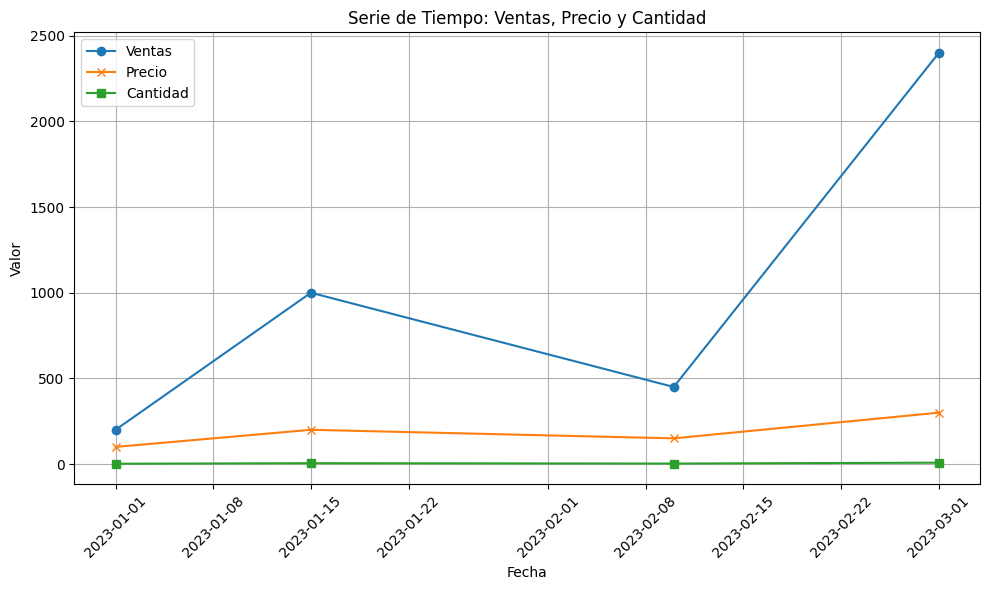

In [9]:
# prompt: crear una grafica en serie tiempo de fecha con las ventas, y precio y la cantidad

import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' as in the provided code
# If not, replace 'data' with the actual name of your DataFrame

# Create the time series plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.plot(data["Fecha"], data["Total"], label="Ventas", marker='o') #ventas
plt.plot(data["Fecha"], data["Precio"], label="Precio", marker='x') #precio
plt.plot(data["Fecha"], data["Cantidad"], label="Cantidad", marker='s') #cantidad


plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Serie de Tiempo: Ventas, Precio y Cantidad")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show()


## <font color="red">5.3 Extracción de Características a partir de Texto
El procesamiento de texto permite transformar datos no estructurados en representaciones numéricas útiles.
### <font color="blue">5.3.1 Tokenización y Conteo de Palabras
La tokenización divide el texto en palabras o frases, y el conteo de palabras mide la frecuencia de términos en un texto.


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Datos de texto
data_texto = pd.DataFrame({
    "Texto": ["Hola mundo", "Machine learning es un mundo increíble", "Python es muy popular en mundo"]
})
data_texto


,Texto
0,Hola mundo
1,Machine learning es un mundo increíble
2,Python es muy popular en mundo


In [13]:
# Vectorizador de palabras
vectorizer = CountVectorizer()
matriz_frecuencia = vectorizer.fit_transform(data_texto["Texto"])

# Mostrar el vocabulario y la matriz
print("\nVocabulario:", vectorizer.get_feature_names_out())
print("Matriz de frecuencia:\n", matriz_frecuencia.toarray())


Vocabulario: ['en' 'es' 'hola' 'increíble' 'learning' 'machine' 'mundo' 'muy' 'popular'
 'python' 'un']
Matriz de frecuencia:
 [[0 0 1 0 0 0 1 0 0 0 0]
 [0 1 0 1 1 1 1 0 0 0 1]
 [1 1 0 0 0 0 1 1 1 1 0]]


In [14]:
palabras=pd.DataFrame(matriz_frecuencia.toarray(),columns=vectorizer.get_feature_names_out())
palabras

,en,es,hola,increíble,learning,machine,mundo,muy,popular,python,un
0,0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,1,1,1,1,0,0,0,1
2,1,1,0,0,0,0,1,1,1,1,0


In [15]:
palabras.mundo.sum()

3

In [16]:
# prompt: con vectorizer.get_feature_names_out() y matriz_frecuencia.toarray() devolver la cantidad de frecuencia de cada palabra en el total de las frases

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Datos de texto (usando los mismos datos del ejemplo anterior)
data_texto = pd.DataFrame({
    "Texto": ["Hola mundo", "Machine learning es un mundo increíble", "Python es muy popular en mundo"]
})

# Vectorizador de palabras
vectorizer = CountVectorizer()
matriz_frecuencia = vectorizer.fit_transform(data_texto["Texto"])

# Obtener nombres de características (palabras)
feature_names = vectorizer.get_feature_names_out()

# Obtener la matriz de frecuencia como un array
frequencies = matriz_frecuencia.toarray()

# Crear un diccionario para almacenar las frecuencias de cada palabra
word_frequencies = {}

# Iterar sobre las características (palabras)
for i, word in enumerate(feature_names):
  # Sumar las frecuencias de la palabra en todas las frases
  word_frequencies[word] = sum(frequencies[:, i])

# Imprimir las frecuencias de cada palabra
for word, frequency in word_frequencies.items():
    print(f"La palabra '{word}' aparece {frequency} veces en total.")


La palabra 'en' aparece 1 veces en total.
La palabra 'es' aparece 2 veces en total.
La palabra 'hola' aparece 1 veces en total.
La palabra 'increíble' aparece 1 veces en total.
La palabra 'learning' aparece 1 veces en total.
La palabra 'machine' aparece 1 veces en total.
La palabra 'mundo' aparece 3 veces en total.
La palabra 'muy' aparece 1 veces en total.
La palabra 'popular' aparece 1 veces en total.
La palabra 'python' aparece 1 veces en total.
La palabra 'un' aparece 1 veces en total.


## <font color="red">5.4 Extracción de Características Geoespaciales
Los datos geoespaciales pueden enriquecerse mediante cálculos como distancias, regiones o agrupaciones espaciales.
### Ejemplo: Distancia entre coordenadas
Utilizamos la fórmula de Haversine para calcular la distancia entre dos puntos geográficos.


In [17]:
from geopy.distance import geodesic


# Coordenadas de dos ubicaciones
data_geo = pd.DataFrame({
    "Latitud": [19.4326, 40.7128],  # Ciudad de México, Nueva York
    "Longitud": [-99.1332, -74.0060]
})


# Calcular distancias desde un punto de referencia
referencia = (19.4326, -99.1332)  # Ciudad de México
data_geo["Distancia_km"] = data_geo.apply(
    lambda row: geodesic(referencia, (row["Latitud"], row["Longitud"])).kilometers, axis=1
)
print("\nDatos con distancia geoespacial:\n", data_geo)


Datos con distancia geoespacial:
    Latitud  Longitud  Distancia_km
0  19.4326  -99.1332        0.0000
1  40.7128  -74.0060     3357.6952


In [18]:
# prompt: crear un dataframe con datos sintéticos que tenga la edad que va de 17 a 22 años, la ubicación (latitud y longitud) en la perfieria de bucaramanga, el nombre de estudiante, la nota de inteligencia artificial  1 a 5.
import pandas as pd
import numpy as np
np.random.seed(0)

# Número de estudiantes
n_students = 100

# Generar edades aleatorias entre 17 y 22
edades = np.random.randint(17, 23, size=n_students)

# Definir coordenadas centrales de Bucaramanga
lat_center = 7.1254
lon_center = -73.1198

# Generar coordenadas aleatorias alrededor del centro (periferia)
radio = 3  # Radio en kilómetros
latitudes = lat_center + np.random.uniform(-0.01, 0.01, size=n_students) # Ajuste para obtener una variación en la latitud dentro del radio aproximado
longitudes = lon_center + np.random.uniform(-0.01, 0.01, size=n_students) # Ajuste para obtener una variación en la longitud dentro del radio aproximado

# Generar nombres de estudiantes aleatorios (ejemplo)
nombres = [f"Estudiante {i}" for i in range(1, n_students + 1)]

# Generar notas de IA aleatorias entre 1 y 5
notas_ia = np.random.randint(1, 6, size=n_students)

# Crear el DataFrame
df = pd.DataFrame({
    "Edad": edades,
    "Latitud": latitudes,
    "Longitud": longitudes,
    "Nombre": nombres,
    "Nota_IA": notas_ia
})

df


,Edad,Latitud,Longitud,Nombre,Nota_IA
0,21,7.127857,-73.110918,Estudiante 1,1
1,22,7.128873,-73.114800,Estudiante 2,2
2,17,7.134839,-73.123012,Estudiante 3,1
3,20,7.132964,-73.120009,Estudiante 4,4
4,20,7.125592,-73.123020,Estudiante 5,2
...,...,...,...,...,...
95,18,7.116412,-73.118687,Estudiante 96,4
96,20,7.122710,-73.129615,Estudiante 97,2
97,17,7.115733,-73.113139,Estudiante 98,4
98,22,7.120015,-73.110113,Estudiante 99,5


In [19]:
#7.11711, -73.10501
# Calcular distancias desde un punto de referencia
referencia = (7.11711, -73.10501)  # Ubicación unab
df["Distancia_km"] = df.apply(
    lambda row: geodesic(referencia, (row["Latitud"], row["Longitud"])).kilometers, axis=1
)
print("\nDatos con distancia geoespacial:\n", df)


Datos con distancia geoespacial:
     Edad   Latitud   Longitud          Nombre  Nota_IA  Distancia_km
0     21  7.127857 -73.110918    Estudiante 1        1      1.355889
1     22  7.128873 -73.114800    Estudiante 2        2      1.691722
2     17  7.134839 -73.123012    Estudiante 3        1      2.792612
3     20  7.132964 -73.120009    Estudiante 4        4      2.412322
4     20  7.125592 -73.123020    Estudiante 5        2      2.199603
..   ...       ...        ...             ...      ...           ...
95    18  7.116412 -73.118687   Estudiante 96        4      1.512838
96    20  7.122710 -73.129615   Estudiante 97        2      2.787718
97    17  7.115733 -73.113139   Estudiante 98        4      0.910846
98    22  7.120015 -73.110113   Estudiante 99        5      0.648865
99    17  7.130698 -73.115730  Estudiante 100        1      1.913262

[100 rows x 6 columns]


In [20]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(df, lat = 'Latitud', lon = 'Longitud', size = 'Distancia_km',color = 'Nota_IA',
                        color_continuous_scale = px.colors.DEFAULT_PLOTLY_COLORS,size_max = 15,
                        zoom = 4, mapbox_style = 'open-street-map',center = {'lon': -73.1198, 'lat': 7.1254},)

fig.show()

## <font color="red">5.5 Visualización de Nuevas Características
### <font color="blue">5.5.1 Gráfico de características temporales y relaciones


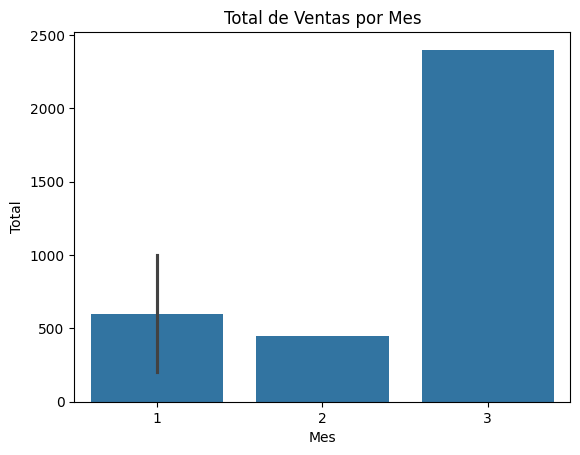

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de Total por Mes
sns.barplot(x="Mes", y="Total", data=data)
plt.title("Total de Ventas por Mes")
plt.show()


### <font color="blue">5.5.2 Gráfico de distribución geoespacial


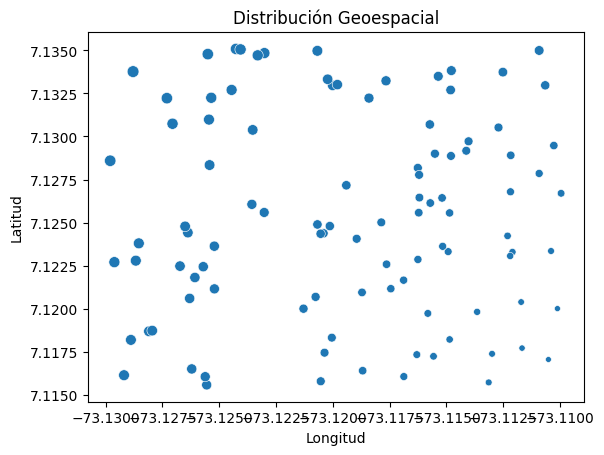

In [22]:
# Gráfico de puntos geográficos
sns.scatterplot(x="Longitud", y="Latitud", size="Distancia_km", data=df, legend=False)
plt.title("Distribución Geoespacial")
plt.show()
